# Day 1: Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
data = pd.DataFrame(boston.data)

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

- CRIM - per capita crime rate in town
- ZN - proportion of residential land zoned for lots over 25K sq ft
- INDUS: proportion of non-retail business acres per town
- CHAS: charles river dummy variable (1 if tract bounds river)
- NOX: nitrous oxide concentrations ppm
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to 5 Boston employment centers
- RAD: accessibility to radial highways
- TAX: full value property tax rate per 10K USD
- PTRATIO: pupil-teacher ratio by town
- B: 1000(bk - 0.63)^2 where bk is proportion of Black residents
- LSTAT: % lower status of the population
- MEDV: median value of the owner occupied homes in 1K USD


In [10]:
data['MEDV'] = boston.target

In [11]:
data.MEDV

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

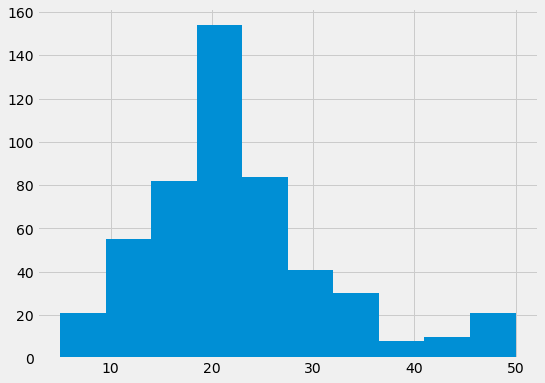

In [15]:
plt.hist(data.MEDV)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler

In [17]:
y = data.MEDV
x = data.drop(labels="MEDV", axis=1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=322)

In [20]:
lr = LinearRegression().fit(x_train, y_train)

In [22]:
lr.score(x_test, y_test)

0.7588249672214188

In [23]:
 y_pred = lr.predict(x_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

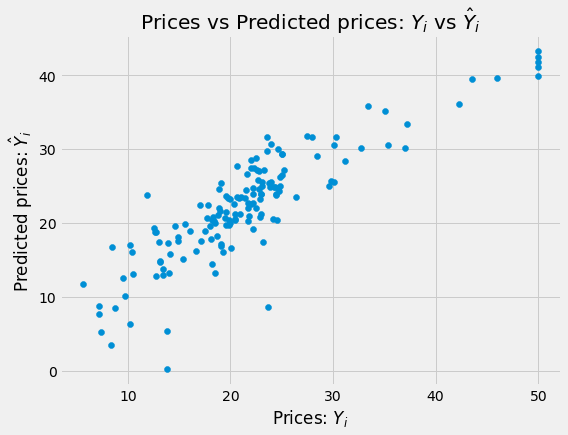

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [25]:
scores = cross_val_score(lr, x, y, cv=5)

In [26]:
scores.mean()

0.35327592439587674

In [27]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=322)

In [28]:
scores = cross_val_score(lr, x, y, cv=cv)

In [29]:
scores.mean()

0.7214391554086756

In [30]:
X = StandardScaler().fit_transform(x)

In [31]:
scores = cross_val_score(lr, X, y, cv=cv)

In [32]:
scores.mean()

0.7214391554086764

In [33]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [40]:
alphas = np.logspace(0, 5, 500)
r = RidgeCV(alphas=alphas, cv=5)
r.fit(X, y)

RidgeCV(alphas=array([1.00000000e+00, 1.02334021e+00, 1.04722519e+00, 1.07166765e+00,
       1.09668060e+00, 1.12227736e+00, 1.14847155e+00, 1.17527712e+00,
       1.20270833e+00, 1.23077980e+00, 1.25950646e+00, 1.28890361e+00,
       1.31898690e+00, 1.34977233e+00, 1.38127630e+00, 1.41351558e+00,
       1.44650734e+00, 1.48026913e+00, 1.51481892e+00, 1.55017512e+00,
       1.58635653e+00, 1.62338243e+0...
       5.88219040e+04, 6.01948197e+04, 6.15997796e+04, 6.30375315e+04,
       6.45088409e+04, 6.60144909e+04, 6.75552832e+04, 6.91320378e+04,
       7.07455942e+04, 7.23968114e+04, 7.40865683e+04, 7.58157646e+04,
       7.75853206e+04, 7.93961785e+04, 8.12493021e+04, 8.31456781e+04,
       8.50863158e+04, 8.70722485e+04, 8.91045332e+04, 9.11842520e+04,
       9.33125118e+04, 9.54904456e+04, 9.77192128e+04, 1.00000000e+05]),
        cv=5)

In [41]:
alpha = r.alpha_

In [42]:
ridge = Ridge(alpha = alpha)

In [43]:
ridge_scores = cross_val_score(ridge, X, y, cv=cv)

In [44]:
ridge_scores.mean()

0.7063806620837869

In [45]:
lasso = LassoCV(n_alphas=100, cv=10)
lasso.fit(X, y)

LassoCV(cv=10)

In [46]:
alpha = lasso.alpha_

In [47]:
l = Lasso(alpha=alpha)

In [48]:
l_score = cross_val_score(l, X, y, cv=cv)

In [49]:
l_score.mean()

0.7140103554734725